
# furusatonouzei.py
## Notebook showing how to use japandata.furusatonouzei
### Author: Sam Passaglia


In [1]:
import os
import numpy as np

PLOT_FOLDER = os.path.join(os.getcwd(),'furusatonouzei_output/')
output_filetypes = ['pdf']
os.makedirs(PLOT_FOLDER, exist_ok=True)

In [2]:
oku = 10**8

## Data format

In [3]:
from japandata.furusatonouzei.data import furusato_arr, furusato_df, furusato_pref_df

In [4]:
furusato_arr

<xarray.Dataset>
Dimensions:                       (prefecturecity: 1788, year: 5)
Coordinates:
  * prefecturecity                (prefecturecity) object '三重県unassigned' ......
  * year                          (year) int64 2016 2017 2018 2019 2020
Data variables: (12/24)
    prefecture                    (prefecturecity, year) object '三重県' ... '鹿児島県'
    city                          (prefecturecity, year) object 'unassigned' ...
    donations-count               (prefecturecity, year) int64 227 175 ... 3276
    donations                     (prefecturecity, year) int64 5993126 ... 56...
    donations-from-outside-count  (prefecturecity, year) int64 50 26 ... 3276
    donations-from-outside        (prefecturecity, year) int64 1453000 ... 56...
    ...                            ...
    pref-reported-donations       (prefecturecity, year) float64 nan ... 4.07...
    pref-reported-deductions      (prefecturecity, year) float64 nan ... 1.30...
    reported-people               (prefecturecity, year) float64 nan ... 56.0
    reported-donations            (prefecturecity, year) float64 nan ... 4.07...
    deductions                    (prefecturecity, year) float64 nan ... 3.26...
    netgainminusdeductions        (prefecturecity, year) float64 nan ... 2.91...

In [5]:
furusato_df.dtypes

prefecturecity                   object
year                              int64
prefecture                       object
city                             object
donations-count                   int64
donations                         int64
donations-from-outside-count      int64
donations-from-outside            int64
donations-disaster-count          int64
donations-disaster                int64
product-cost                      int64
shipping-cost                     int64
total-cost                        int64
net-gain                          int64
code                             object
flag                               bool
city-reported-people            float64
city-reported-donations         float64
city-reported-deductions        float64
pref-reported-people            float64
pref-reported-donations         float64
pref-reported-deductions        float64
reported-people                 float64
reported-donations              float64
deductions                      float64


## Matplotlib plots 

In [6]:
import matplotlib.pyplot as plt
from samplot.utils import init_plotting
import matplotlib
try:
    ## Load my helper plotting module if it is available
    from samplot.utils import init_plotting
    import samplot.colors as samcolors
except ImportError():
    def init_plotting(**_): return plt.subplots()
matplotlib.rcParams['figure.dpi']= 150

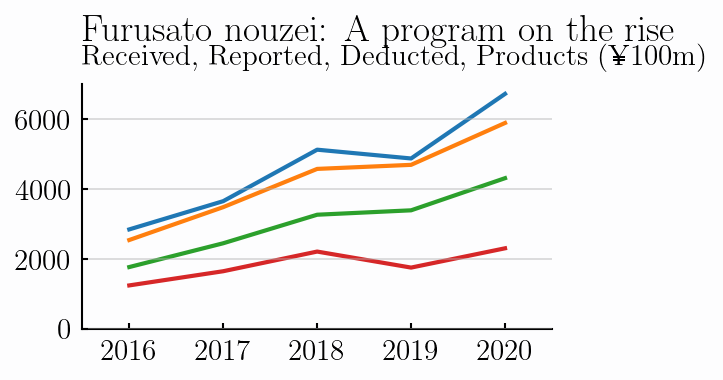

In [7]:
fig, ax = init_plotting(style='nyt', figsize=(4,3))
title_string = r"Furusato nouzei: A program on the rise"
subtitle_string = r"Received, Reported, Deducted, Products (¥100m)"
ax.set_title(subtitle_string, x=0., y=1.0, fontsize=14,ha='left',va='bottom')
fig.suptitle(title_string, x=0,y=1.15, fontsize=18,ha='left',va='bottom', transform=ax.transAxes)
ax.set_xlim(min(furusato_arr.year)-.5,max(furusato_arr.year)+.5)
ax.plot(furusato_arr.year, furusato_arr['donations'].sum(dim='prefecturecity')/oku, label= 'Municipalities Received')
ax.plot(furusato_arr.year, furusato_arr['reported-donations'].sum(dim='prefecturecity')/oku, label= 'People Reported Donating')
ax.plot(furusato_arr.year, furusato_arr['deductions'].sum(dim='prefecturecity')/oku, label= 'Deductions Received')
ax.plot(furusato_arr.year, (furusato_arr['product-cost']+furusato_arr['shipping-cost']).sum(dim='prefecturecity')/oku, label= 'Value of Products Received')
ax.set_ylim([0,7000])
for suffix in output_filetypes:
    fig.savefig(PLOT_FOLDER+'donations-report-loss.'+suffix, transparent=True)


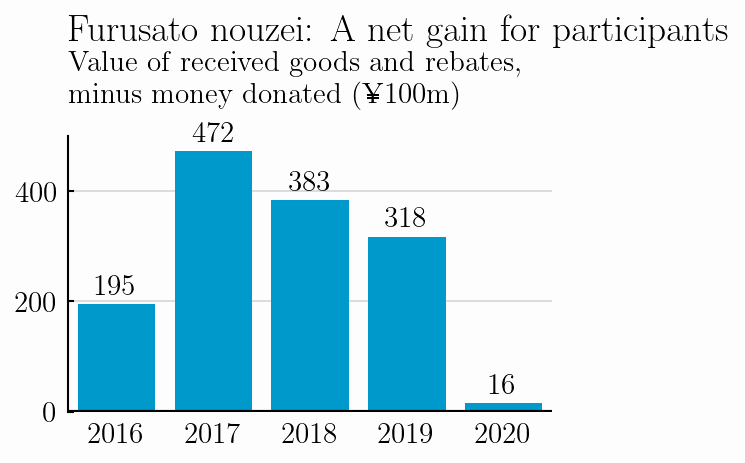

In [8]:
fig, ax = init_plotting(style='nyt',figsize=(4,3.5))
title_string = r"Furusato nouzei: A net gain for participants"
subtitle_string = r"Value of received goods and rebates," "\n" "minus money donated (¥100m)"
ax.set_title(subtitle_string, x=0., y=1.05, fontsize=14,ha='left',va='bottom')
fig.suptitle(title_string, x=0,y=1.32, fontsize=18,ha='left',va='bottom', transform=ax.transAxes)
ax.set_ylim([0, +500])
ax.set_xlim(min(furusato_arr.year)-.5,max(furusato_arr.year)+.5)
ax.axhline(0, color='black')
ax.set_axisbelow(True)
cmap = lambda val: samcolors.ColorsMarcoBlue if val>0 else samcolors.ColorsMarcoRed
gains_by_people = (furusato_arr['deductions']+furusato_arr['product-cost']+furusato_arr['shipping-cost']-furusato_arr['donations']).sum(dim='prefecturecity')/oku
pos_inds = np.where(gains_by_people>=0)[0]
pos_years = furusato_arr.year[pos_inds]
pos_gains_by_people = gains_by_people[pos_inds]
pos_bar = ax.bar(pos_years, pos_gains_by_people, color = [cmap(val) for val in pos_gains_by_people])
ax.bar_label(pos_bar,fmt='%.0f',padding=2)
neg_inds = np.where(gains_by_people<0)[0]
neg_years = furusato_arr.year[neg_inds]
neg_gains_by_people = gains_by_people[neg_inds]
neg_bar = ax.bar(neg_years, neg_gains_by_people, color = [cmap(val) for val in neg_gains_by_people])
ax.bar_label(neg_bar,fmt='%.0f',padding=3)
ax.spines['bottom'].set_color('none')
ax.tick_params(axis=u'x', which=u'both',length=0, pad=5)
for suffix in output_filetypes:
    fig.savefig(PLOT_FOLDER+'net-donations-by-people.'+suffix, transparent=True)

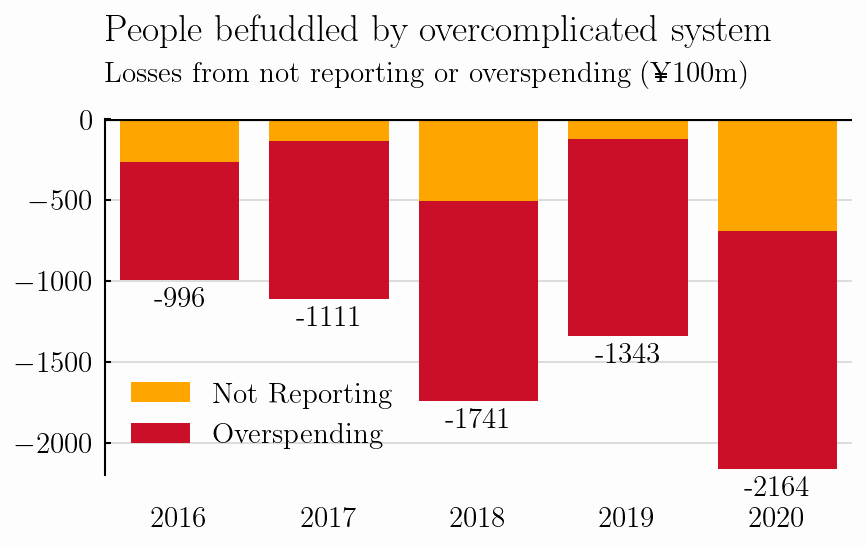

In [9]:
fig, ax = init_plotting(style='nyt')
title_string = r"People befuddled by overcomplicated system"
subtitle_string = r"Losses from not reporting or overspending (¥100m)"
ax.set_title(subtitle_string, x=0., y=1.05, fontsize=14,ha='left',va='bottom')
fig.suptitle(title_string, x=0,y=1.2, fontsize=18,ha='left',va='bottom', transform=ax.transAxes)
ax.set_ylim([-2200,0])
ax.set_xlim(min(furusato_arr.year)-.5,max(furusato_arr.year)+.5)
ax.set_axisbelow(True)
ax.yaxis.grid(alpha=.5)
loss_to_not_reporting = (furusato_arr['reported-donations']-furusato_arr['donations']).sum(dim='prefecturecity')/oku
loss_to_overspending = (furusato_arr['deductions']+2000*furusato_arr['reported-people']-furusato_arr['donations']).sum(dim='prefecturecity')/oku
smallerbar = ax.bar(furusato_arr.year, loss_to_not_reporting, color = samcolors.nice_colors(1),label='Not Reporting',zorder=20)
bar = ax.bar(furusato_arr.year, loss_to_overspending, color = samcolors.nice_colors(0),label='Overspending',zorder=10)
ax.bar_label(bar,fmt='%.0f',padding=3)    
ax.axhline(0, color='black', zorder=30)
ax.legend(loc='lower left')
ax.spines['bottom'].set_color('none')
ax.tick_params(axis=u'x', which=u'both',length=0, pad=15)
for suffix in output_filetypes:
    fig.savefig(PLOT_FOLDER+'mistakes.'+suffix, transparent=True)

In [ ]:
fig, ax = init_plotting(style='nyt', figsize=(5,4))
title_string = r"Loss Percentile "
subtitle_string = r" (¥100m)"
ax.set_title(subtitle_string, x=0., y=1.05, fontsize=14,ha='left',va='bottom')
fig.suptitle(title_string, x=0,y=1.2, fontsize=18,ha='left',va='bottom', transform=ax.transAxes)
colors = [samcolors.nice_colors(i/len(furusato_arr.year)) for i in range(len(furusato_arr.year))]
for i, year in enumerate(furusato_arr.year):
    vals = furusato_arr.loc[{'year':year}]['netgainminusdeductions'].values
    vals = vals[np.where(np.isnan(vals)==False)]
    inds = np.argsort(vals)
    ax.plot(np.arange(1, len(vals)+1)/len(vals)*100,np.abs(vals[inds]/oku), color=colors[i], label=year.values)
ax.legend()
ax.set_yscale('log')
ax.set_axisbelow(True)
ax.set_ylim([10**-1,10**2])
ax.axhline(0)
for suffix in output_filetypes:
    fig.savefig(PLOT_FOLDER+'percentile.'+suffix, transparent=True)

In [ ]:
fig, ax = init_plotting(style='nyt')
title_string = r'Loss/Gain Distribution'
subtitle_string = r" (¥100m)"
ax.set_title(subtitle_string, x=0., y=1.05, fontsize=14,ha='left',va='bottom')
fig.suptitle(title_string, x=0,y=1.2, fontsize=18,ha='left',va='bottom', transform=ax.transAxes)
colors = [samcolors.nice_colors(i/len(furusato_arr.year)) for i in range(len(furusato_arr.year))]
for i, year in enumerate(furusato_arr.year):
    net = furusato_arr.loc[{'year':year}]['netgainminusdeductions'].values
    net = net[~np.isnan(net)]
    inds = np.argsort(net)
    ax.hist(net[inds]/oku,density=True, bins=50,color=colors[i], label=year)
ax.legend()
ax.set_yscale('log')
ax.set_axisbelow(True)
ax.axhline(0)
for suffix in output_filetypes:
    fig.savefig(PLOT_FOLDER+'histogram.'+suffix, transparent=True)

In [ ]:
fig, ax = init_plotting(style='nyt')
title_string = r"Cumulative Donations"
subtitle_string = r"Fraction"
ax.set_title(subtitle_string, x=0., y=1.05, fontsize=14,ha='left',va='bottom')
fig.suptitle(title_string, x=0,y=1.2, fontsize=18,ha='left',va='bottom', transform=ax.transAxes)
colors = [samcolors.nice_colors(i/len(furusato_arr.year)) for i in range(len(furusato_arr.year))]
for i, year in enumerate(furusato_arr.year):
    donations = furusato_arr.loc[{'year':year}]['donations'].values
    donations = np.sort(donations[~np.isnan(donations)])
    ax.plot(np.arange(1, len(donations)+1)/len(donations)*100,donations.cumsum()/donations.sum(), color=colors[i], label=year.values)
ax.legend()
ax.set_axisbelow(True)
for suffix in output_filetypes:
    fig.savefig(PLOT_FOLDER+'cumulative_furusato_arr.'+suffix, transparent=True)

In [ ]:
fig, ax = init_plotting(style='nyt')
donation_fraction = .1
title_string = r"Most gains go to just a few places"
subtitle_string = r"Fraction of municipalities getting " + str(int(donation_fraction*100)) + "\% of donations"
ax.set_title(subtitle_string, x=0., y=1.05, fontsize=14,ha='left',va='bottom')
fig.suptitle(title_string, x=0,y=1.2, fontsize=18,ha='left',va='bottom', transform=ax.transAxes)
ax.set_xlim(min(furusato_arr.year)-.5,max(furusato_arr.year)+.5)
ax.set_axisbelow(True)
ax.yaxis.grid(alpha=.5)
fraction_list = []
for i, year in enumerate(furusato_arr.year):
    donations = furusato_arr.loc[{'year':year}]['donations'].values
    donations = np.sort(donations[~np.isnan(donations)])[::-1]
    total_donations = donations.sum()
    number_of_towns = np.where((donations.cumsum()-donation_fraction*total_donations) > 0)[0][0]+1
    fraction_list.append(number_of_towns/len(donations))
ax.bar(furusato_arr.year, fraction_list, color =samcolors.ColorsMarcoBlue)
for suffix in output_filetypes:
    fig.savefig(PLOT_FOLDER+'donation_fraction.'+suffix, transparent=True)

In [ ]:
fig, ax = init_plotting(style='nyt')
donation_fraction = .1
title_string = r"Most gains go to just a few places"
subtitle_string = r"Number of municipalities getting " + str(int(donation_fraction*100)) + "\% of donations"
ax.set_title(subtitle_string, x=0., y=1.05, fontsize=14,ha='left',va='bottom')
fig.suptitle(title_string, x=0,y=1.2, fontsize=18,ha='left',va='bottom', transform=ax.transAxes)
ax.set_xlim(min(furusato_arr.year)-.5,max(furusato_arr.year)+.5)
ax.set_axisbelow(True)
ax.yaxis.grid(alpha=.5)
number_list = []
for i, year in enumerate(furusato_arr.year):
    donations = furusato_arr.loc[{'year':year}]['donations'].values
    donations = np.sort(donations[~np.isnan(donations)])[::-1]
    total_donations = donations.sum()
    number_of_towns = np.where((donations.cumsum()-donation_fraction*total_donations) > 0)[0][0]+1
    number_list.append(number_of_towns)
ax.bar(furusato_arr.year, number_list, color =samcolors.ColorsMarcoBlue)
for suffix in output_filetypes:
    fig.savefig(PLOT_FOLDER+'donation_number.'+suffix, transparent=True)

In [ ]:
fig, ax = init_plotting(style='nyt')
topN = 10
title_string = r"Most gains go to just a few places"
subtitle_string = r"Fraction of donations going to top " + str(int(topN)) + " municipalities (of "  + str(np.sum(~np.isnan(furusato_arr.loc[{'year':year}]['donations'].values))) + ')'
ax.set_title(subtitle_string, x=0., y=1.05, fontsize=14,ha='left',va='bottom')
fig.suptitle(title_string, x=0,y=1.2, fontsize=18,ha='left',va='bottom', transform=ax.transAxes)
ax.set_xlim(min(furusato_arr.year)-.5,max(furusato_arr.year)+.5)
ax.set_axisbelow(True)
ax.yaxis.grid(alpha=.5)
fraction_list = []
for i, year in enumerate(furusato_arr.year):
    donations = furusato_arr.loc[{'year':year}]['donations'].values
    donations = np.sort(donations[~np.isnan(donations)])[::-1]
    total_donations = donations.sum()
    fraction_list.append(np.sum(donations[:topN]/total_donations))
ax.bar(furusato_arr.year, fraction_list, color =samcolors.ColorsMarcoBlue)
for suffix in output_filetypes:
    fig.savefig(PLOT_FOLDER+'donation_topN.'+suffix, transparent=True)

In [ ]:
fig, ax = init_plotting(style='nyt')
plt.rcParams['text.usetex'] = 'False'
plt.rcParams['font.family'] = 'Hiragino Maru Gothic Pro'
topN = 10
title_string = r"Donations Ranking"
fig.suptitle(title_string, y=.92, fontsize=14)
city_list = []
for i, year in enumerate(furusato_arr.year):
    inds = np.argsort(furusato_arr.loc[{'year':year}]['donations'].values)[::-1]
    city_list.append(furusato_arr.loc[{'year':year}]['city'][inds][0:topN].values)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.box(on=None)
uniques,counts=np.unique(city_list,return_counts=True)
colors = dict()
totalcolorsneeded = len(np.where(counts>1)[0])
j=0
cmap=matplotlib.cm.get_cmap('tab20c')
for i, unique in enumerate(uniques):
    if counts[i] == 1:
        colors[unique] = "w"
    else:
        colors[unique] = cmap(j/(totalcolorsneeded)*16/20)
        j+=1

city_list = np.array(city_list).T
cellColours = np.ones_like(city_list)
for i in range(len(city_list)):
    for j in range(len(city_list[i])):
        cellColours[i,j] = colors[city_list[i,j]]
table = ax.table(cellText=city_list,
        cellColours=cellColours.tolist(),
        colLabels=furusato_arr.year.values,
        rowLabels=[str(i+1) + '.' for i in range(topN)],
        cellLoc='center',
        loc='center')
table.auto_set_font_size(False)            
table.set_fontsize(12)
table.scale(1.5, 2)
ax.axis('tight')
ax.axis('off')
for suffix in output_filetypes:
    fig.savefig(PLOT_FOLDER+'topN_table.'+suffix, transparent=True)

In [ ]:
fig, ax = init_plotting(style='nyt')
plt.rcParams['text.usetex'] = 'False'
plt.rcParams['font.family'] = 'Hiragino Maru Gothic Pro'
topN = 10
title_string = r"Net Gain Ranking"
fig.suptitle(title_string, y=.92, fontsize=14)
city_list = []
for i, year in enumerate(furusato_arr.year):
    inds = np.argsort(np.nan_to_num(furusato_arr.loc[{'year':year}]['netgainminusdeductions'].values))[::-1]
    city_list.append(furusato_arr.loc[{'year':year}]['city'][inds][0:topN].values)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.box(on=None)
uniques,counts=np.unique(city_list,return_counts=True)
colors = dict()
totalcolorsneeded = len(np.where(counts>1)[0])
j=0
cmap=matplotlib.cm.get_cmap('tab20c')
for i, unique in enumerate(uniques):
    if counts[i] == 1:
        colors[unique] = "w"
    else:
        colors[unique] = cmap(j/(totalcolorsneeded)*16/20)
        j+=1

city_list = np.array(city_list).T
cellColours = np.ones_like(city_list)
for i in range(len(city_list)):
    for j in range(len(city_list[i])):
        cellColours[i,j] = colors[city_list[i,j]]
table = ax.table(cellText=city_list,
        cellColours=cellColours.tolist(),
        colLabels=furusato_arr.year.values,
        rowLabels=[str(i+1) + '.' for i in range(topN)],
        cellLoc='center',
        loc='center')
table.auto_set_font_size(False)            
table.set_fontsize(12)
table.scale(1.5, 2)
ax.axis('tight')
ax.axis('off')
for suffix in output_filetypes:
    fig.savefig(PLOT_FOLDER+'topN_net_table.'+suffix, transparent=True)

In [ ]:
plt.close('all')